In [2]:
import numpy as np
import os
import pandas as pd
import plotnine as pn

In [3]:
pd.set_option('display.max_rows', None)

In [4]:
main_path = '/Users/kurtsmith/research/multiagent-rl/data/testing/constantbot/'
ddpg_path = main_path + 'ddpg/'
rdpg_path = main_path + 'rdpg/'
ddpg_runs = os.listdir(ddpg_path)
rdpg_runs = os.listdir(rdpg_path)
ddpg_runs = [f'{ddpg_path}{run}/' for run in ddpg_runs]
rdpg_runs = [f'{rdpg_path}{run}/' for run in rdpg_runs]

In [5]:
def get_runs(subdir, main_path=main_path, exp_name=None):
    path = main_path + subdir + '/'
    runs = os.listdir(path)
    runs = [f'{path}{run}/' for run in runs]
    if exp_name:
        exp_runs = []
        for r in runs:
            in_exp = False
            c = open(f'{r}config.json', "r")
            for line in c:
                if re.search(f'"{exp_name}",', line):
                    in_exp = True
            if in_exp: 
                exp_runs.append(r)
            runs = exp_runs
    prog = {x: pd.read_table(f'{x}progress.txt') for x in runs}
    for i, r in enumerate(prog):
        prog[r]['run'] = f'run_{i}'
    prog = pd.concat(prog.values())
    return prog, runs

In [6]:
import re

exp_name = "polya_0_900"
conf = "/Users/kurtsmith/research/multiagent-rl/data/testing/constantbot/ddpg_orig/1610835051/config.json"
conf = open(conf, "r")
for line in conf:
    if re.search(f'"{exp_name}",', line):
        print(line)

    "exp_name":	"polya_0_900",

            "exp_name":	"polya_0_900",

        "exp_name":	"polya_0_900",



In [7]:
ddpg, ddpg_runs = get_runs('ddpg', exp_name = 'q_32x4')
ddpg_noise_5, _ = get_runs('ddpg', exp_name = 'q_32x4_noise_0_5')
ddpg_noise_02, _ = get_runs('ddpg', exp_name = 'q_32x4_noise_0_02')

In [8]:
ddpg_orig, ddpg_orig_runs = get_runs('ddpg_orig', exp_name = 'q_32x4')
rdpg, rdpg_runs = get_runs('rdpg')
ddpg_polya, _ = get_runs('ddpg_orig', exp_name = 'polya_0_900')
ddpg_gamma, _ = get_runs('ddpg_orig', exp_name = 'gamma_0_00')
td3_orig, _ = get_runs('td3_orig', exp_name = 'q_32x4')
td3_gamma, _ = get_runs('td3_orig', exp_name = 'gamma_0_00')

In [9]:
td3_nonflat, _ = get_runs('td3', exp_name = 'nonflat_reward')

EmptyDataError: No columns to parse from file

In [217]:
sac, _ = get_runs('sac_orig', exp_name = 'q_32x2')

In [318]:
sac_decr_98, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_98')
sac_decr_94, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_94')
sac_decr_90, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_90')
sac_decr_50, _ = get_runs('sac_orig', exp_name = 'decreasing_alpha_50')
sac_auto, _ = get_runs('sac_orig', exp_name = 'auto_alpha')
sac_orig_auto_t4, _ = get_runs('sac_orig', exp_name = 'new_auto_alpha_targ_4')
sac_done_auto_t4, _ = get_runs('sac_orig', exp_name = 'done_auto_alpha_targ_4')
sac_orig_auto_t8, _ = get_runs('sac_orig', exp_name = 'auto_alpha_targ_8')



In [463]:
sac, _ = get_runs('sac', exp_name = 'first_sac_test')
sac_auto_t4, _ = get_runs('sac', exp_name = 'auto_alpha_targ_4')
sac_done_t4, _ = get_runs('sac', exp_name = 'done_alpha_targ_4')
sac_auto_t8, _ = get_runs('sac', exp_name = 'auto_alpha_targ_8')

# Try tuning alpha/entr targ/LR with gamma=0.
# Should be solvable!
sac_gamma_0, _ = get_runs('sac', exp_name = 'gamma_0_alpha_05_targ_4')
sac_gamma_50, _ = get_runs('sac', exp_name = 'gamma_50_alpha_05_targ_4')
sac_gamma_90, _ = get_runs('sac', exp_name = 'gamma_90_alpha_05_targ_4')
sac_gamma_99, _ = get_runs('sac', exp_name = 'gamma_99_alpha_05_targ_4')
sac_gamma_99_a_20, _ = get_runs('sac', exp_name = 'gamma_99_alpha_20_targ_4')
sac_gamma_99_a_20_t1, _ = get_runs('sac', exp_name = 'gamma_99_alpha_20_targ_1')
sac_gamma_99_done, _ = get_runs('sac', exp_name = 'gamma_99_done')
sac_gamma_99_done2, _ = get_runs('sac', exp_name = 'gamma_99_done_loss')
sac_random_10, _ = get_runs('sac', exp_name = 'random_d')
sac_random_01, _ = get_runs('sac', exp_name = 'random_01')
sac_random_001, _ = get_runs('sac', exp_name = 'random_001')
sac_permute, _ = get_runs('sac', exp_name = 'permute_d')
sac_zeros, _ = get_runs('sac', exp_name = 'zeros_like')
sac_random_01_lr_01, _ = get_runs('sac', exp_name = 'random_01_lr_01')
sac_random_01_lr2_01, _ = get_runs('sac', exp_name = 'random_01_lr2_01')
sac_nonflat, nfr = get_runs('sac', exp_name = 'standard_nonflat')

In [464]:
sac_100, _ = get_runs('sac', exp_name = 'ep_len_100')

In [465]:
# var = 'AverageTestActOffer'
# var = 'AverageTestActDemand'
# var = 'LossPi'
var = 'AverageTestEpRet'
# var = 'AverageEpRet'

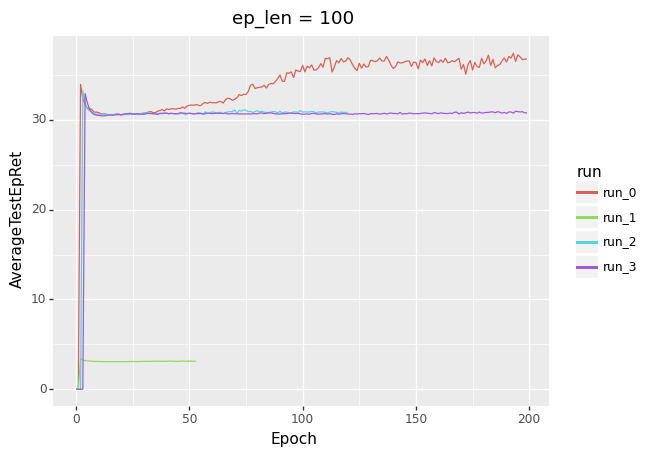

<ggplot: (8790607287535)>

In [466]:
display(pn.ggplot(sac_100, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='ep_len = 100'))

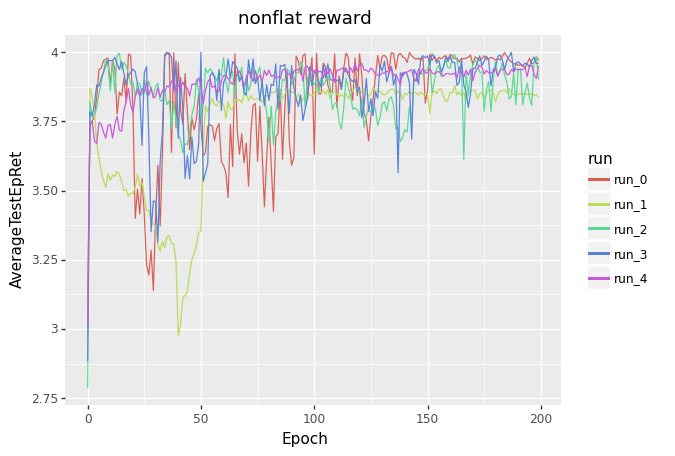

<ggplot: (-9223363246214104460)>

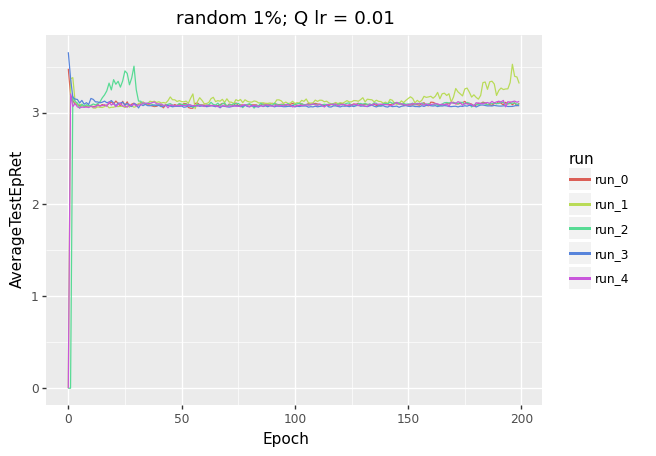

<ggplot: (8790691146458)>

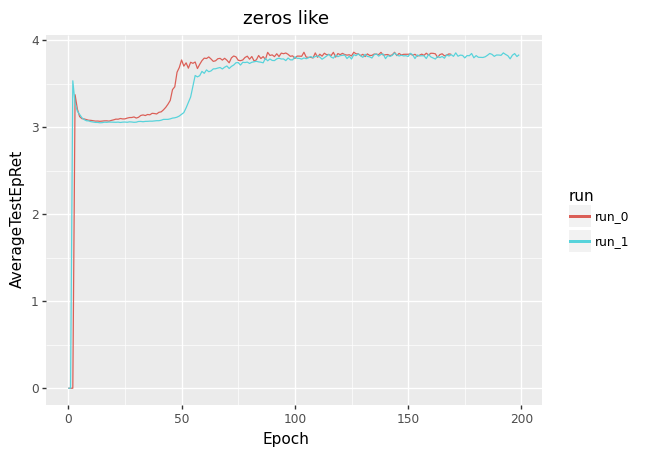

<ggplot: (8790708419311)>

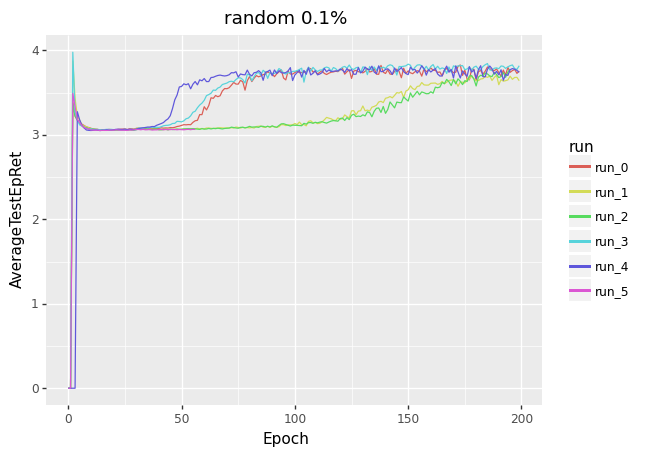

<ggplot: (8790708419311)>

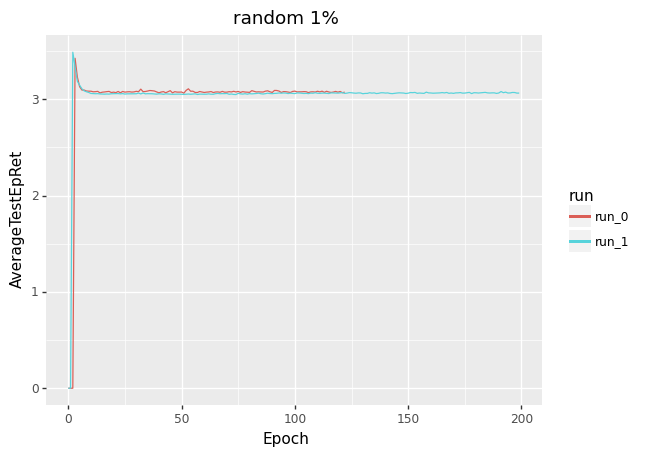

<ggplot: (8790489757062)>

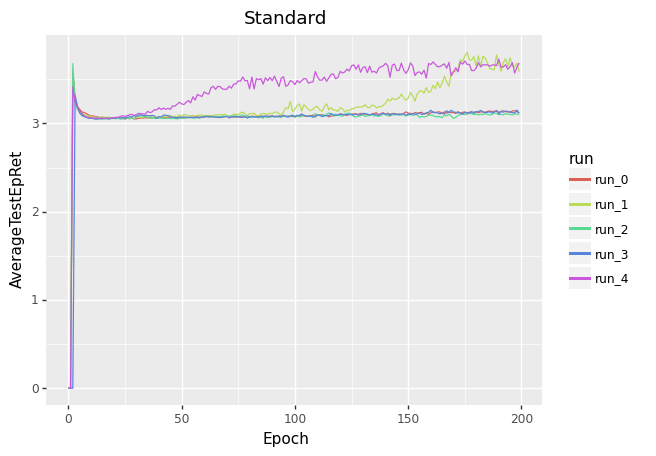

<ggplot: (8790573611570)>

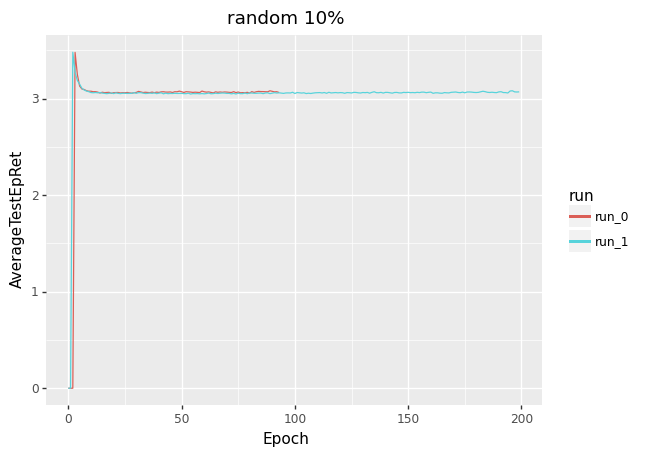

<ggplot: (-9223363246381879068)>

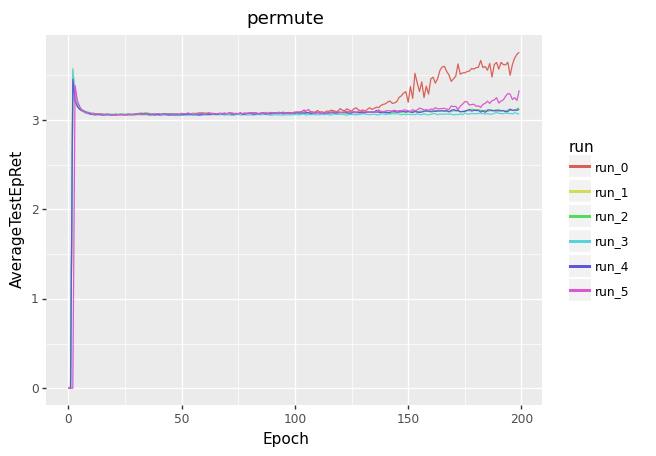

<ggplot: (8790708419311)>

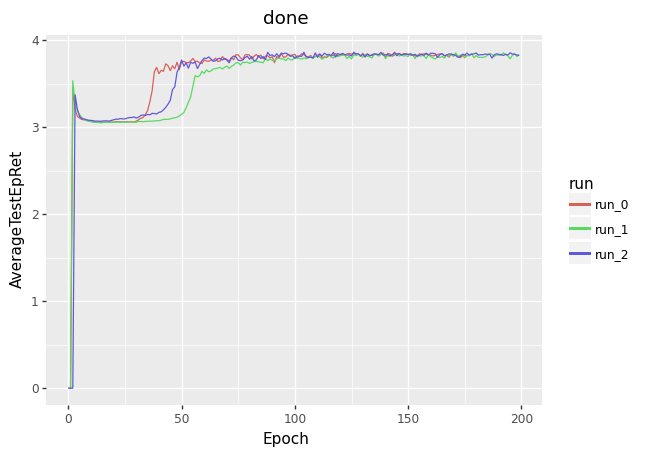

<ggplot: (8790691146416)>

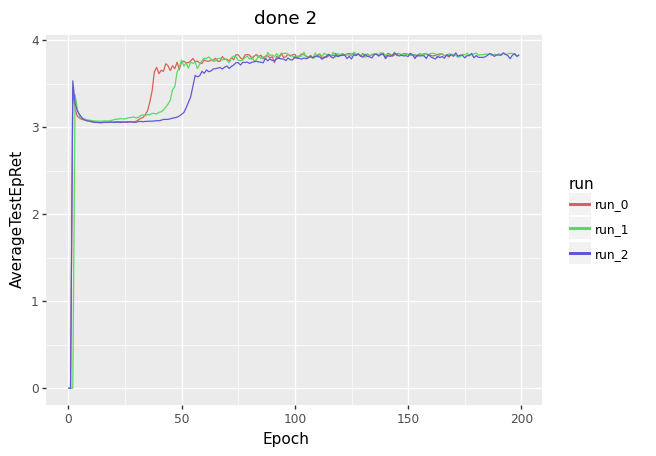

<ggplot: (8790489757062)>

In [467]:
display(pn.ggplot(sac_nonflat, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='nonflat reward'))
display(pn.ggplot(sac_random_01_lr2_01, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 1%; Q lr = 0.01'))
display(pn.ggplot(sac_zeros, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='zeros like'))
display(pn.ggplot(sac_random_001, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 0.1%'))
display(pn.ggplot(sac_random_01, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 1%'))
display(pn.ggplot(sac_gamma_99, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='Standard'))
display(pn.ggplot(sac_random_10, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='random 10%'))
display(pn.ggplot(sac_permute, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='permute'))
display(pn.ggplot(sac_gamma_99_done, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='done'))
display(pn.ggplot(sac_gamma_99_done2, pn.aes(x='Epoch', y=var, color='run')) + pn.geom_line() + pn.labs(title='done 2'))

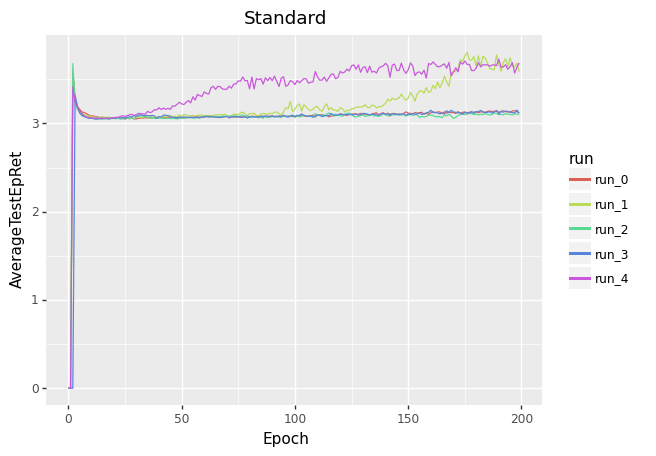

<ggplot: (-9223363246347903912)>

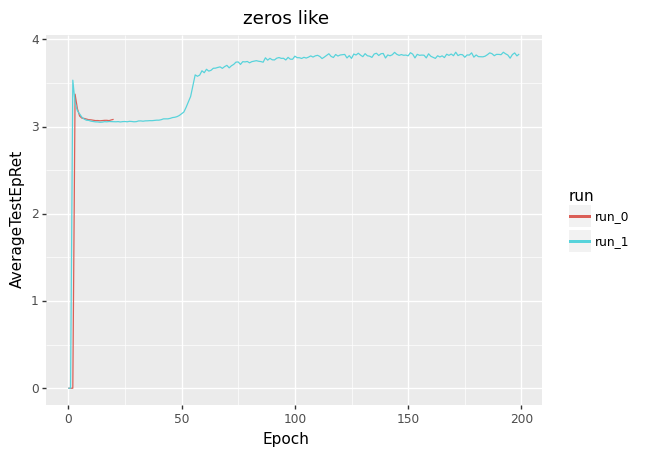

<ggplot: (8790506871991)>

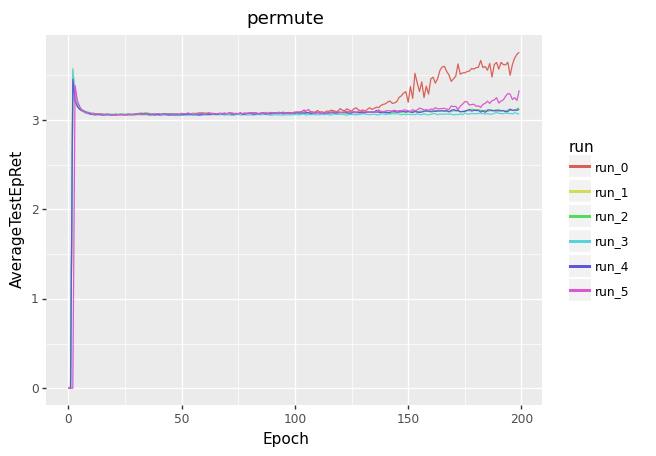

<ggplot: (8790506871893)>

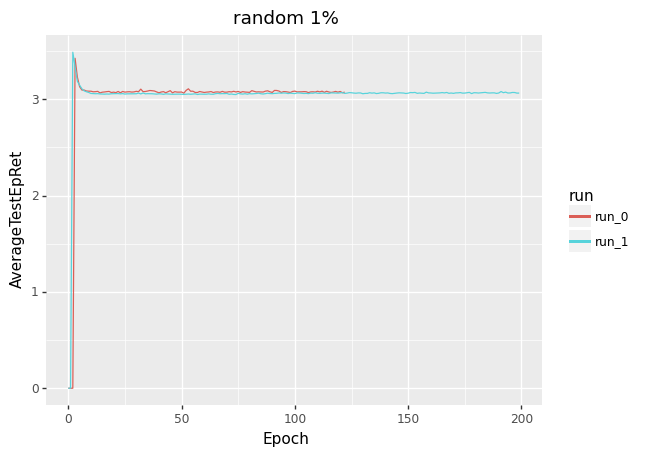

<ggplot: (-9223363246347903891)>

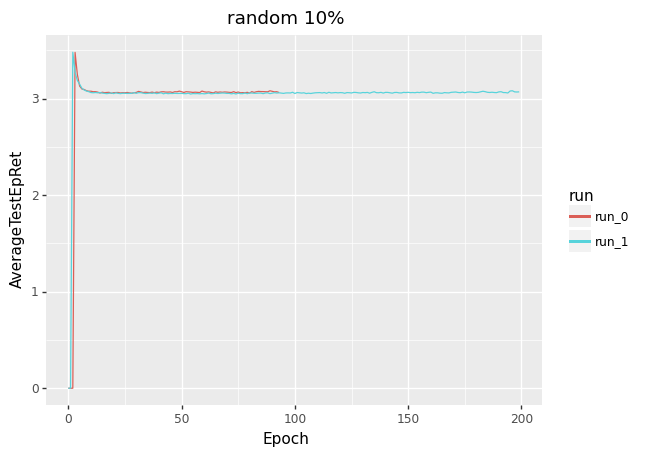

<ggplot: (-9223363246347903912)>

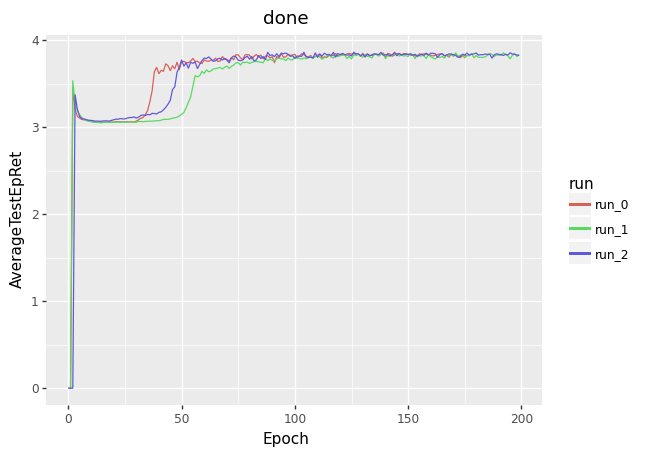

<ggplot: (-9223363246347903891)>

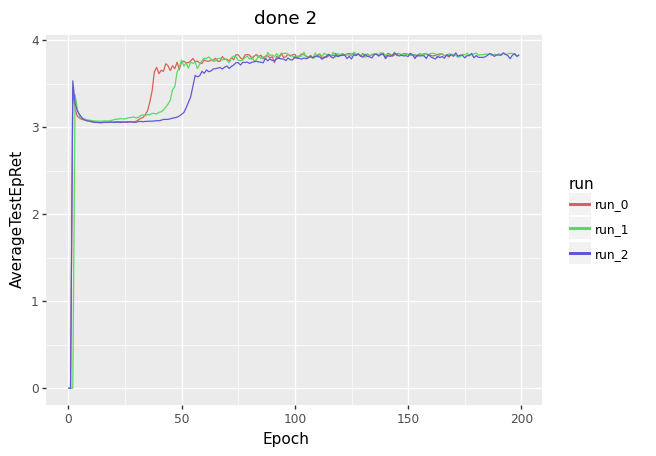

<ggplot: (-9223363246347903835)>

99 a 20


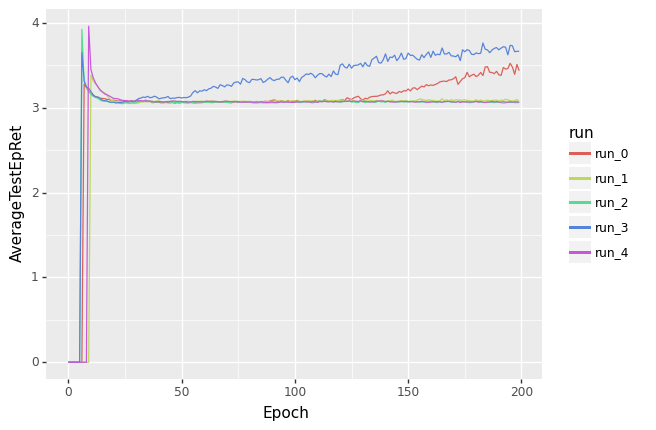

<ggplot: (-9223363246347903891)>

99 a 20 t1


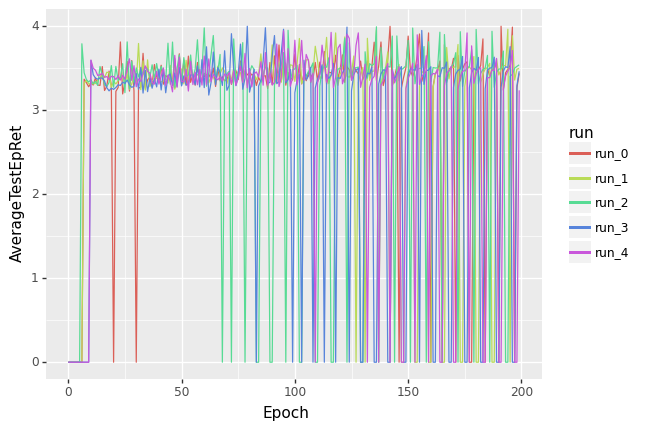

<ggplot: (-9223363246347903891)>

0


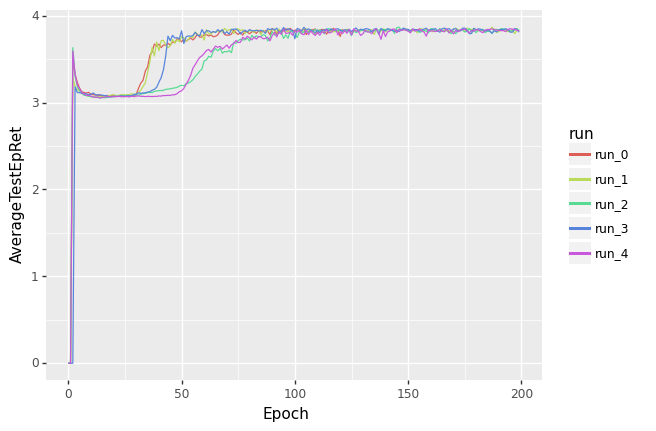

<ggplot: (-9223363246347903891)>

50


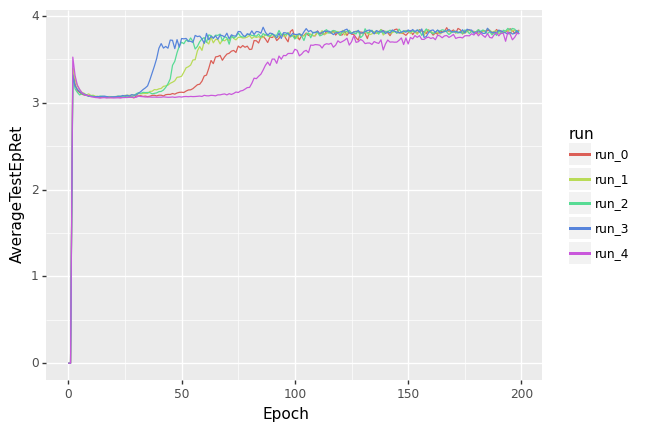

<ggplot: (-9223363246347903891)>

90


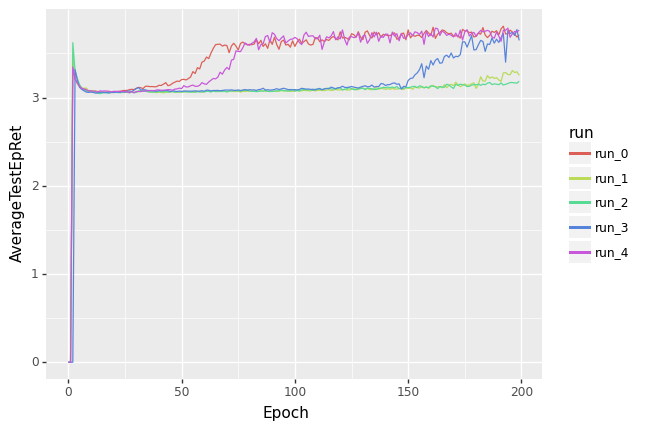

<ggplot: (8790557076670)>

In [365]:
print('99 a 20')
display(pn.ggplot(sac_gamma_99_a_20, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('99 a 20 t1')
display(pn.ggplot(sac_gamma_99_a_20_t1, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('0')
display(pn.ggplot(sac_gamma_0, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('50')
display(pn.ggplot(sac_gamma_50, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))
print('90')
display(pn.ggplot(sac_gamma_90, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line() + pn.labs(title=''))

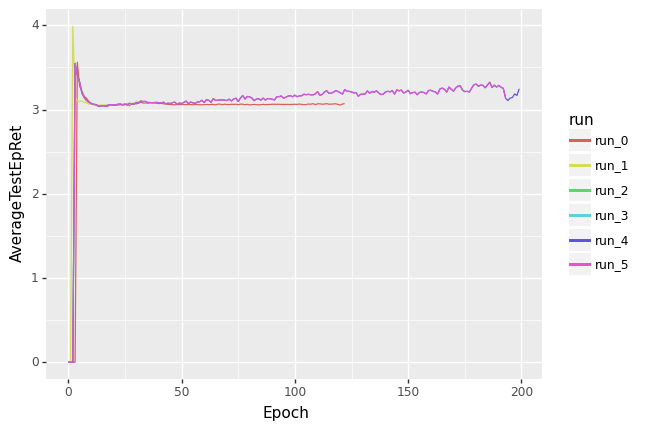

<ggplot: (-9223363246247649469)>

In [209]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

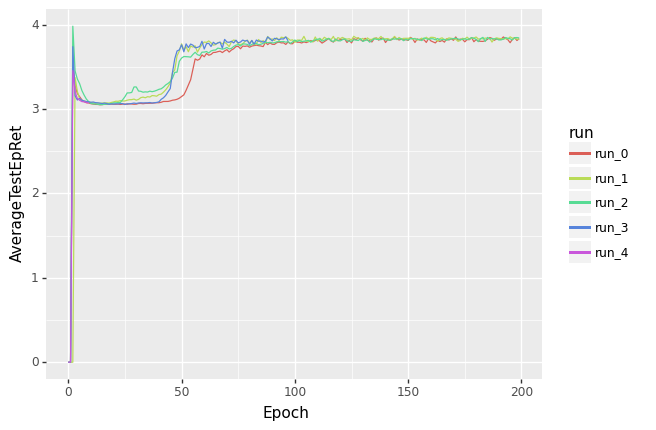

<ggplot: (-9223363246281150888)>

In [162]:
pn.ggplot(sac_done_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

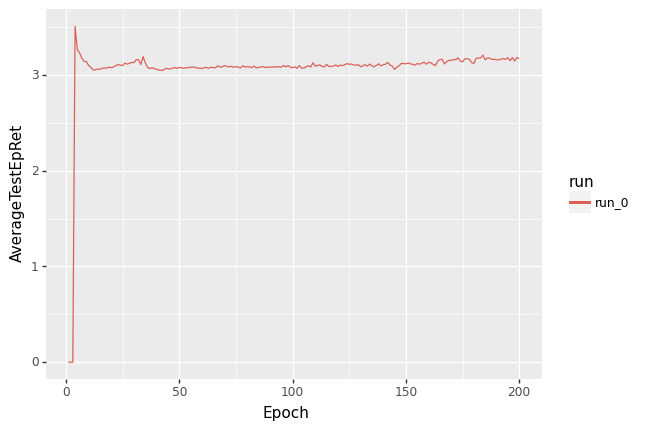

<ggplot: (8790607138361)>

In [119]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

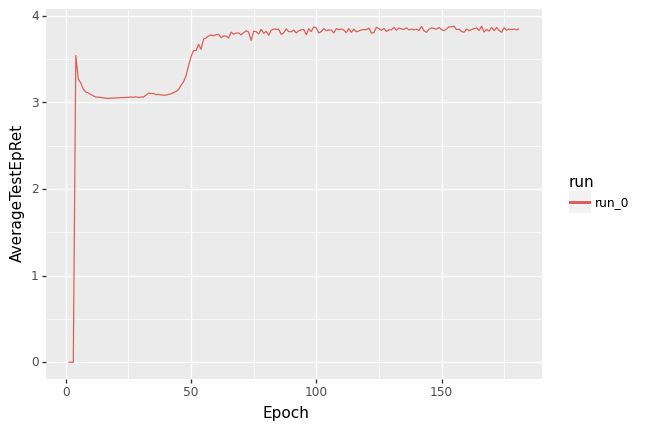

<ggplot: (-9223363246281183074)>

In [122]:
pn.ggplot(sac_done_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

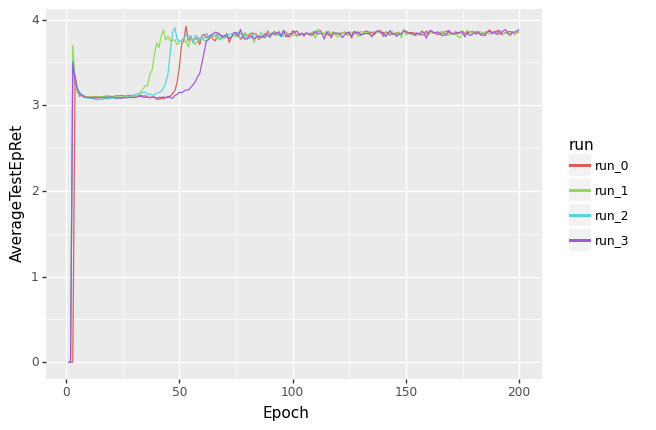

<ggplot: (-9223363246281177982)>

In [33]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

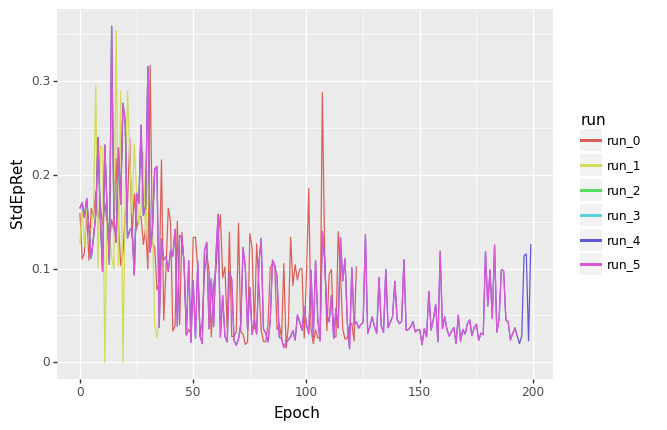

<ggplot: (8790640674957)>

In [96]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='StdEpRet', color='run')) + pn.geom_line()

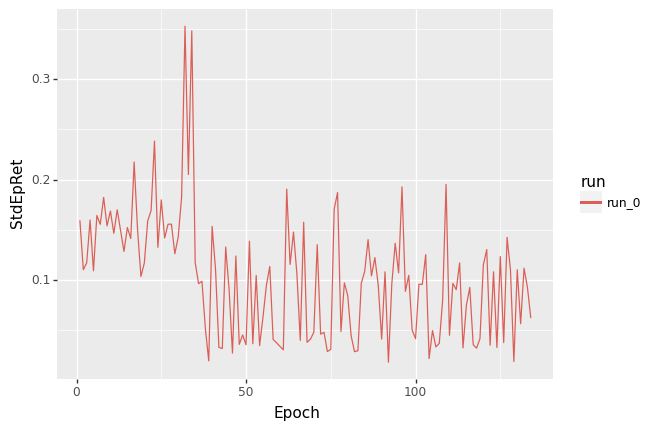

<ggplot: (-9223363246214100981)>

In [97]:
pn.ggplot(sac_orig_auto_t4, pn.aes(x='Epoch', y='StdEpRet', color='run')) + pn.geom_line()

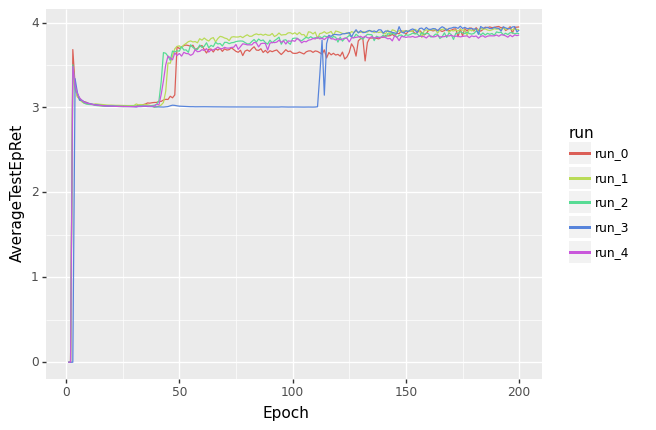

<ggplot: (-9223363246180283069)>

In [100]:
pn.ggplot(sac_orig_auto_t8, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(td3_nonflat, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_auto, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

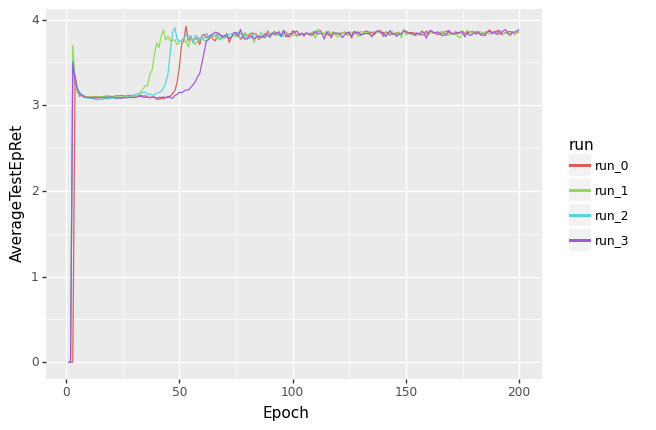

<ggplot: (8790657353655)>

In [14]:
pn.ggplot(sac_auto_t4, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_auto_t8, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_98, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_94, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_90, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(sac_decr_50, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
display(sac[sac["Epoch"]==200])
display(sac_auto_t4[sac_auto_t4["Epoch"]==200])
display(sac_auto_t8[sac_auto_t8["Epoch"]==200])

display(sac_decr_98[sac_decr_98["Epoch"]==200])
display(sac_decr_94[sac_decr_94["Epoch"]==200])
display(sac_decr_90[sac_decr_90["Epoch"]==200])
display(sac_decr_50[sac_decr_50["Epoch"]==200])

In [ ]:
pn.ggplot(td3_orig, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(td3_gamma, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_orig, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_polya, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='LossQ', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='LossPi', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_gamma, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_noise_5, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg_noise_02, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='LossQ', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='LossPi', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(ddpg, pn.aes(x='Epoch', y='StdQVals', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(rdpg, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line()

In [ ]:
pn.ggplot(rdpg, pn.aes(x='Epoch', y='AverageQVals', color='run')) + pn.geom_line()

In [886]:
# q1_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_1_map.csv")
# q2_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_2_map.csv")

q1_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_low_entr_1_map.csv")
q2_map = pd.read_csv("/Users/kurtsmith/research/multiagent-rl/data/q_low_entr_2_map.csv")

In [887]:
q1_map.shape

(255025, 9)

In [888]:
step_vals = q1_map['step'].unique()
print(step_vals)

[ 4999  9999 14999 19999 24999 29999 34999 39999 44999 49999 54999 59999]


In [1019]:
sac, nfr = get_runs('sac', exp_name = 'alpha_8')

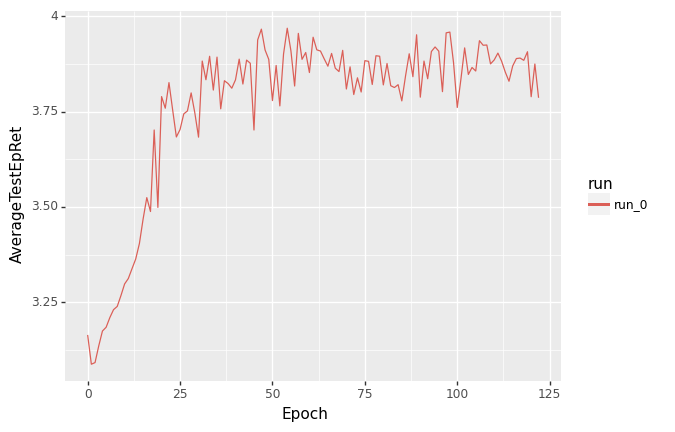

<ggplot: (8790590840896)>

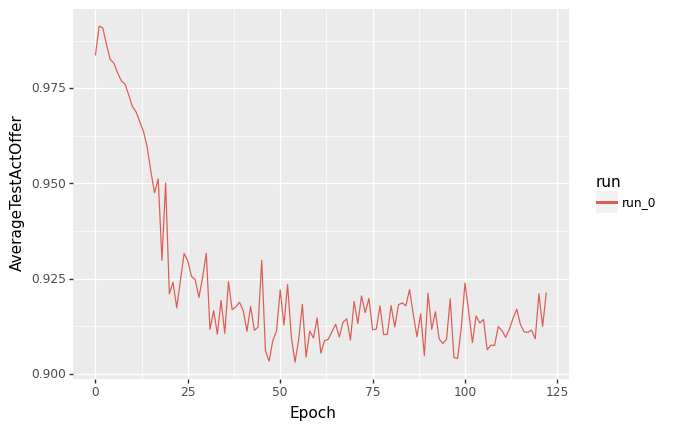

<ggplot: (8790625066132)>

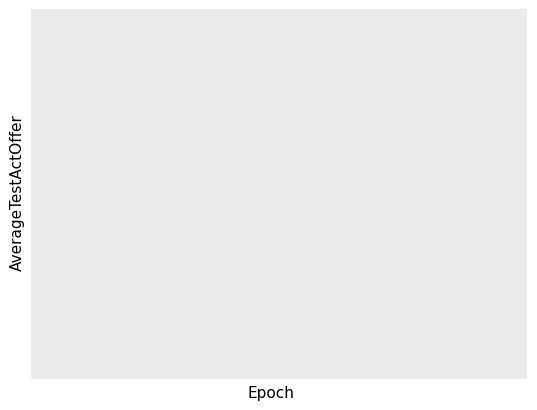

<ggplot: (-9223363246280738430)>

In [1020]:
display(pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestEpRet', color='run')) + pn.geom_line())
display(pn.ggplot(sac, pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())
display(pn.ggplot(sac[sac['run']=='run_4'], pn.aes(x='Epoch', y='AverageTestActOffer', color='run')) + pn.geom_line())

In [910]:
cols = ['a_0', 'a_1', 'q', 'step']
merge_cols = ['a_0', 'a_1', 'step']
q_comb = pd.merge(q1_map[cols], q2_map[cols], on =merge_cols)
q_comb['q'] = q_comb[['q_x', 'q_y']].min(axis=1)

In [911]:
# q_map = q1_map
# q_map = q2_map
q_map = q_comb

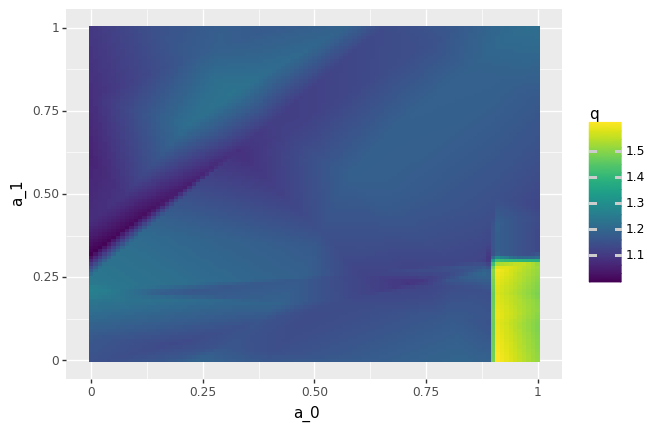

<ggplot: (8790473162353)>

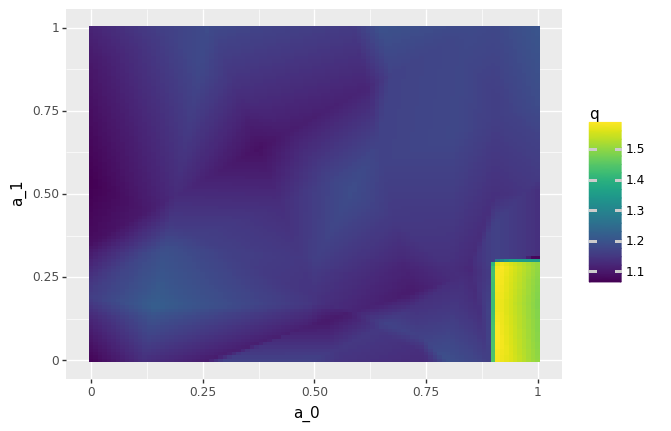

<ggplot: (8790473162332)>

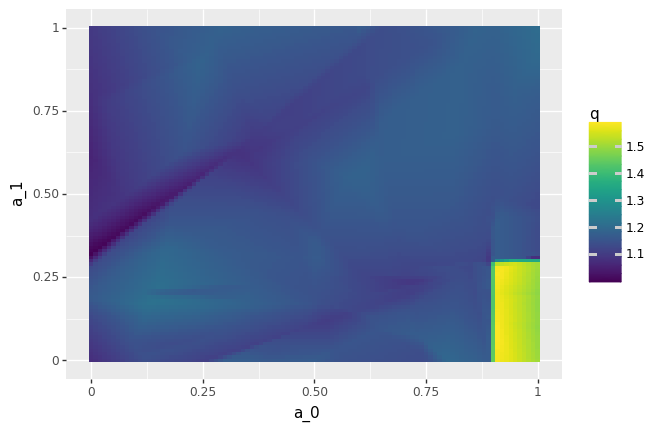

<ggplot: (8790473162269)>

In [912]:
step = step_vals[-1]
# step = 5000
display(pn.ggplot(q1_map[q1_map['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())
display(pn.ggplot(q2_map[q2_map['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())
display(pn.ggplot(q_comb[q_comb['step']==step], pn.aes('a_0', 'a_1', fill='q')) + pn.geom_tile())

In [913]:
q_map = q_comb

0.0


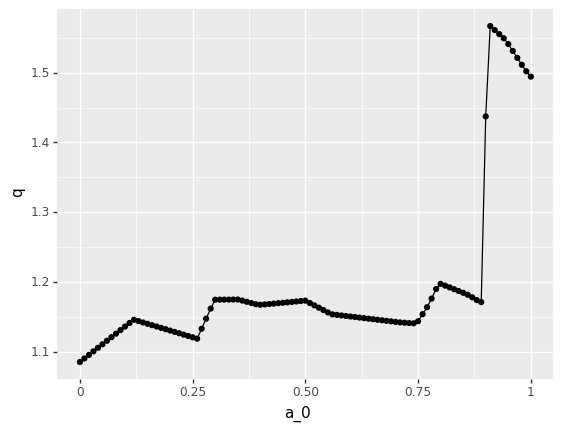

<ggplot: (8790473162388)>

         a_0  a_1       q_x   step       q_y         q
571345  0.89  0.0  1.190765  59999  1.171159  1.171159
571346  0.90  0.0  1.471219  59999  1.437295  1.437295
571347  0.91  0.0  1.593398  59999  1.566869  1.566869
571348  0.92  0.0  1.583130  59999  1.561034  1.561034
571349  0.93  0.0  1.572863  59999  1.555199  1.555199
571350  0.94  0.0  1.562596  59999  1.549364  1.549364
571351  0.95  0.0  1.552328  59999  1.541051  1.541051
571352  0.96  0.0  1.542061  59999  1.531130  1.531130
571353  0.97  0.0  1.531794  59999  1.521208  1.521208
571354  0.98  0.0  1.521526  59999  1.511287  1.511287
571355  0.99  0.0  1.511259  59999  1.501942  1.501942
571356  1.00  0.0  1.500991  59999  1.494300  1.494300
0.1


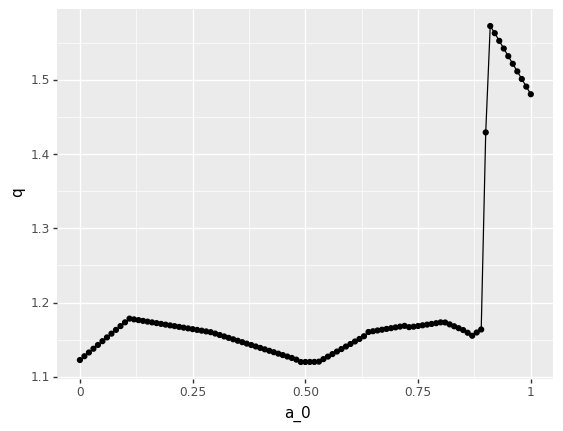

<ggplot: (8790473153302)>

         a_0  a_1       q_x   step       q_y         q
572355  0.89  0.1  1.163638  59999  1.172594  1.163638
572356  0.90  0.1  1.461485  59999  1.429445  1.429445
572357  0.91  0.1  1.573809  59999  1.572958  1.572958
572358  0.92  0.1  1.563389  59999  1.563291  1.563291
572359  0.93  0.1  1.552968  59999  1.553486  1.552968
572360  0.94  0.1  1.542547  59999  1.543681  1.542547
572361  0.95  0.1  1.532249  59999  1.533876  1.532249
572362  0.96  0.1  1.521987  59999  1.524071  1.521987
572363  0.97  0.1  1.511725  59999  1.514266  1.511725
572364  0.98  0.1  1.501463  59999  1.504460  1.501463
572365  0.99  0.1  1.491201  59999  1.494655  1.491201
572366  1.00  0.1  1.480939  59999  1.484850  1.480939
0.2


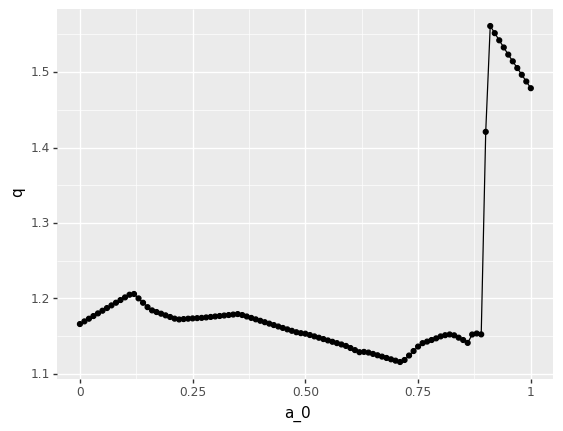

<ggplot: (-9223363246230024409)>

         a_0  a_1       q_x   step       q_y         q
573365  0.89  0.2  1.152365  59999  1.168560  1.152365
573366  0.90  0.2  1.457568  59999  1.420920  1.420920
573367  0.91  0.2  1.561209  59999  1.564380  1.561209
573368  0.92  0.2  1.551728  59999  1.562234  1.551728
573369  0.93  0.2  1.542247  59999  1.552358  1.542247
573370  0.94  0.2  1.532765  59999  1.542482  1.532765
573371  0.95  0.2  1.523284  59999  1.532606  1.523284
573372  0.96  0.2  1.514373  59999  1.522730  1.514373
573373  0.97  0.2  1.505467  59999  1.512854  1.505467
573374  0.98  0.2  1.496561  59999  1.502977  1.496561
573375  0.99  0.2  1.487655  59999  1.493102  1.487655
573376  1.00  0.2  1.478750  59999  1.483225  1.478750
0.3


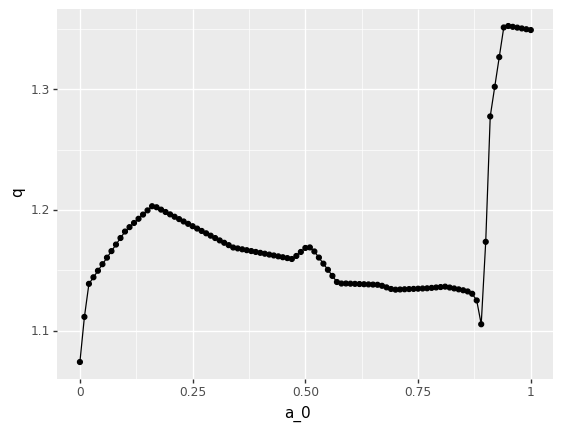

<ggplot: (-9223363246331447124)>

         a_0  a_1       q_x   step       q_y         q
574375  0.89  0.3  1.105312  59999  1.167252  1.105312
574376  0.90  0.3  1.330784  59999  1.173637  1.173637
574377  0.91  0.3  1.415118  59999  1.277546  1.277546
574378  0.92  0.3  1.402489  59999  1.302128  1.302128
574379  0.93  0.3  1.395749  59999  1.326709  1.326709
574380  0.94  0.3  1.392300  59999  1.351291  1.351291
574381  0.95  0.3  1.390721  59999  1.352480  1.352480
574382  0.96  0.3  1.388279  59999  1.351812  1.351812
574383  0.97  0.3  1.385670  59999  1.351144  1.351144
574384  0.98  0.3  1.383062  59999  1.350476  1.350476
574385  0.99  0.3  1.380453  59999  1.349808  1.349808
574386  1.00  0.3  1.377845  59999  1.349139  1.349139


In [914]:
for a_1_cut in [0.0, 0.1, 0.2, 0.3]:
    print(a_1_cut)
    q_slice = q_map[(q_map.a_1==a_1_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_0', 'q')) + pn.geom_point()  + pn.geom_line())
    print(q_slice.tail(12))

0.79


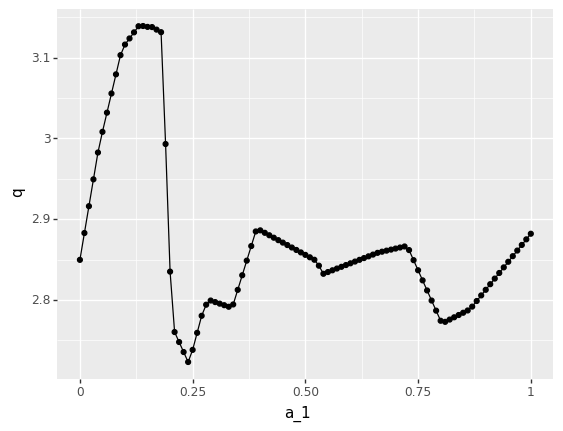

<ggplot: (8790540406739)>

0.8


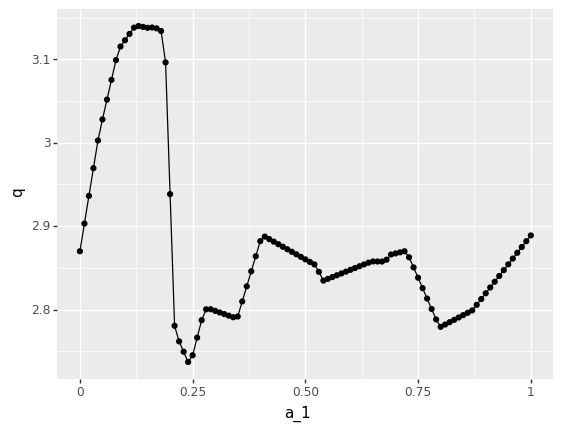

<ggplot: (8790473095309)>

0.81


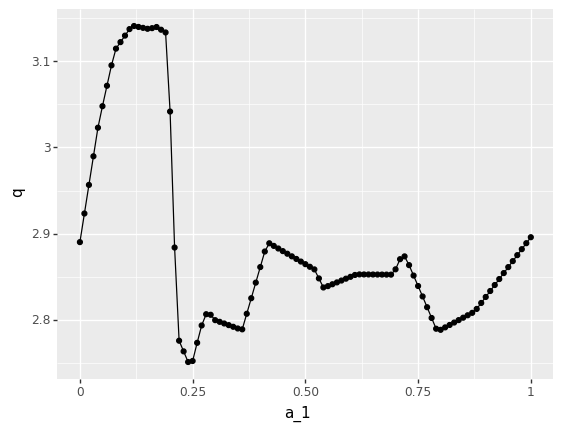

<ggplot: (8790506861709)>

In [766]:
# q_map = q1_map
q_map = q2_map
for a_0_cut in [0.79, 0.8, 0.81]:
    print(a_0_cut)
    q_slice = q_map[(q_map.a_0==a_0_cut) & (q_map['step']==step)]
    display(pn.ggplot(q_slice, pn.aes('a_1', 'q')) + pn.geom_point()  + pn.geom_line())